<a href="https://colab.research.google.com/github/promitdutta-biz/data_analyst_projects/blob/main/Bengaluru_Real_Estate_XGBoost_Regression_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
!pip install shap
import shap

In [ ]:
path= "/content/drive/MyDrive/data_science_proj/datasets_20710_26737_Bengaluru_House_Data.csv"
df = pd.read_csv(path)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
import datetime
def waiting_days(df):
    if str(df['availability']) == 'Ready To Move':
        return 0
    if str(df['availability']) == 'Immediate Possession':
        return 0
    else :
        d1 = datetime.datetime.strptime(df['availability'], "%d-%b")
        d2 = datetime.datetime.strptime('01-Jan', "%d-%b")
        delta= (d1-d2).days
        return delta
df['waiting_days']= df.apply(waiting_days, axis=1)
df.drop('availability',axis=1,inplace=True)
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,waiting_days
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,352
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0


In [ ]:
df['area_type'].value_counts(normalize=True)

Super built-up  Area    0.659910
Built-up  Area          0.181532
Plot  Area              0.152027
Carpet  Area            0.006532
Name: area_type, dtype: float64

In [ ]:
def sqft_range_fix(df):
    if ("-" in df['total_sqft']):
        return float(df['total_sqft'].split("-")[0].strip())
    else:
        return df['total_sqft']
df['total_sqft_new'] = df.apply(sqft_range_fix, axis=1)
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,waiting_days,total_sqft_new
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,352,1056
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,2600
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0,1440
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,1521
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,1200


In [ ]:
def sq_ft_correction(df):
    if ("Sq. Meter" in str(df['total_sqft_new'])):
        return float(df['total_sqft_new'].replace("Sq. Meter",''))*10.7639
    if ("Sq. Yards" in str(df['total_sqft_new'])):
        return float(df['total_sqft_new'].replace("Sq. Yards",''))*9
    if ("Perch" in str(df['total_sqft_new'])):
        return float(df['total_sqft_new'].replace("Perch",''))*272.25
    if ("Acres" in str(df['total_sqft_new'])):
        return float(df['total_sqft_new'].replace("Acres",''))*43560
    if ("Cents" in str(df['total_sqft_new'])):
        return float(df['total_sqft_new'].replace("Cents",''))*435.6
    if ("Guntha" in str(df['total_sqft_new'])):
        return float(df['total_sqft_new'].replace("Guntha",''))*1089
    if ("Grounds" in str(df['total_sqft_new'])):
        return float(df['total_sqft_new'].replace("Grounds",''))*2400.35

    else:
        return df['total_sqft_new']
df['area_sqft']=df.apply(sq_ft_correction,axis=1)
df.drop(['total_sqft','total_sqft_new'],axis=1,inplace=True)
df.head()

,area_type,location,size,society,bath,balcony,price,waiting_days,area_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,2.0,1.0,39.07,352,1056
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,5.0,3.0,120.00,0,2600
2,Built-up Area,Uttarahalli,3 BHK,NaN,2.0,3.0,62.00,0,1440
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,3.0,1.0,95.00,0,1521
4,Super built-up Area,Kothanur,2 BHK,NaN,2.0,1.0,51.00,0,1200


In [ ]:
def size_converter(df):
    if ("Bedroom" in str(df['size'])):
        return df['size'].replace("Bedroom", " ")
    if ("BHK" in str(df['size'])):
        return df['size'].replace("BHK", " ")
    else:
        return df['size']

df['bedrooms'] = df.apply(size_converter, axis=1)
df.drop(df[(df['size'] =='1 RK')].index, inplace=True)
df.drop(['size','society'], axis=1, inplace=True)
df.head()

,area_type,location,bath,balcony,price,waiting_days,area_sqft,bedrooms
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,352,1056,2
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,0,2600,4
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,0,1440,3
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,0,1521,3
4,Super built-up Area,Kothanur,2.0,1.0,51.00,0,1200,2


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

area_type       0
location        0
bath            0
balcony         0
price           0
waiting_days    0
area_sqft       0
bedrooms        0
dtype: int64

In [ ]:
df['area_sqft']=df['area_sqft'].astype('float',errors='ignore')
df['bath']=df['bath'].astype('int',errors='ignore')
df['balcony']=df['balcony'].astype('int',errors='ignore')
df['bedrooms']=df['bedrooms'].astype('int',errors='ignore')

df.dtypes

area_type        object
location         object
bath              int64
balcony           int64
price           float64
waiting_days      int64
area_sqft       float64
bedrooms          int64
dtype: object

In [ ]:
top300_locations = (df['location'].value_counts(normalize=True)*100).to_frame().head(200)
top300_locations.reset_index(inplace=True)
top300_locations.columns=['location','loc_count_share']
loc_list=top300_locations['location'].unique().tolist()

In [ ]:
def loc_tag(df):
    if df['location'] in loc_list:
        return df['location']
    else:
        return 'others'

df['loc_tag']=df.apply(loc_tag, axis=1)
df.head(10)

,area_type,location,bath,balcony,price,waiting_days,area_sqft,bedrooms,loc_tag
0,Super built-up Area,Electronic City Phase II,2,1,39.07,352,1056.0,2,Electronic City Phase II
1,Plot Area,Chikka Tirupathi,5,3,120.00,0,2600.0,4,Chikka Tirupathi
2,Built-up Area,Uttarahalli,2,3,62.00,0,1440.0,3,Uttarahalli
3,Super built-up Area,Lingadheeranahalli,3,1,95.00,0,1521.0,3,Lingadheeranahalli
4,Super built-up Area,Kothanur,2,1,51.00,0,1200.0,2,Kothanur
5,Super built-up Area,Whitefield,2,1,38.00,0,1170.0,2,Whitefield
8,Super built-up Area,Marathahalli,3,1,63.25,0,1310.0,3,Marathahalli
10,Super built-up Area,Whitefield,2,2,70.00,48,1800.0,3,Whitefield
11,Plot Area,Whitefield,5,3,295.00,0,2785.0,4,Whitefield
12,Super built-up Area,7th Phase JP Nagar,2,1,38.00,0,1000.0,2,7th Phase JP Nagar


In [ ]:
unique_string = (" ").join(loc_list)
unique_string

'Whitefield Sarjapur  Road Electronic City Kanakpura Road Thanisandra Yelahanka Uttarahalli Hebbal Raja Rajeshwari Nagar Marathahalli 7th Phase JP Nagar Bannerghatta Road Hennur Road Haralur Road Electronic City Phase II Rajaji Nagar Chandapura Bellandur Hoodi KR Puram Electronics City Phase 1 Begur Road Sarjapur Yeshwanthpur Kasavanhalli Harlur Banashankari Ramamurthy Nagar Hosa Road Hormavu Kengeri Koramangala Old Madras Road Varthur Jakkur JP Nagar Nagarbhavi Kaggadasapura TC Palaya Thigalarapalya Kothanur Akshaya Nagar 8th Phase JP Nagar Budigere Rachenahalli Malleshwaram Panathur Bisuvanahalli Hennur Jalahalli Hulimavu HSR Layout Mysore Road Gottigere Jigani Bhoganhalli Ramagondanahalli Hegde Nagar Kundalahalli Hosur Road Balagere Brookefield CV Raman Nagar Vittasandra Kanakapura Subramanyapura Horamavu Agara Yelahanka New Town Vijayanagar Attibele Talaghattapura Kadugodi Indira Nagar Vidyaranyapura Kengeri Satellite Town Devanahalli Channasandra Kudlu Gate 9th Phase JP Nagar Gree

In [ ]:
repeated_adj_locaton = ['Nagar','Layout', 'City', 'Phase', 'Stage', 'Road', 'Old', 'nagar', 'Town', 'Sector',
                        'II', '2nd', '7th', '1', '8th', 'New', 'Gate', '9th', '5th', 'Area', 'III', '1st', '6th', '-', 'VI', 'East', '2', '7']
for i in repeated_adj_locaton:
    unique_string = unique_string.replace(i," ")
unique_string

'Whitefield Sarjapur    Electronic   Kanakpura   Thanisandra Yelahanka Uttarahalli Hebbal Raja Rajeshwari   Marathahalli     JP   Bannerghatta   Hennur   Haralur   Electronic       Rajaji   Chandapura Bellandur Hoodi KR Puram Electronics       Begur   Sarjapur Yeshwanthpur Kasavanhalli Harlur Banashankari Ramamurthy   Hosa   Hormavu Kengeri Koramangala   Madras   Varthur Jakkur JP    bhavi Kaggadasapura TC Palaya Thigalarapalya Kothanur Akshaya       JP   Budigere Rachenahalli Malleshwaram Panathur Bisuvanahalli Hennur Jalahalli Hulimavu HSR   Mysore   Gottigere Jigani Bhoganhalli Ramagondanahalli Hegde   Kundalahalli Hosur   Balagere Brookefield CV Raman   Vittasandra Kanakapura Subramanyapura Horamavu Agara Yelahanka     Vijaya  Attibele Talaghattapura Kadugodi Indira   Vidyaranyapura Kengeri Satellite   Devanahalli Channasandra Kudlu       JP   Green Glen       JP   Lakshminarayana Pura Bommasandra Anekal Hosakerehalli Sahakara   Tumkur   Kalena Agrahara Bommanahalli Frazer   Ambedk

In [ ]:
from nltk import FreqDist
words = unique_string.split()
fdist1 = FreqDist(words)
#print(fdist1)
L=[]
for i in range(0,len(fdist1.most_common())):
    L.append(fdist1.most_common()[i][0])

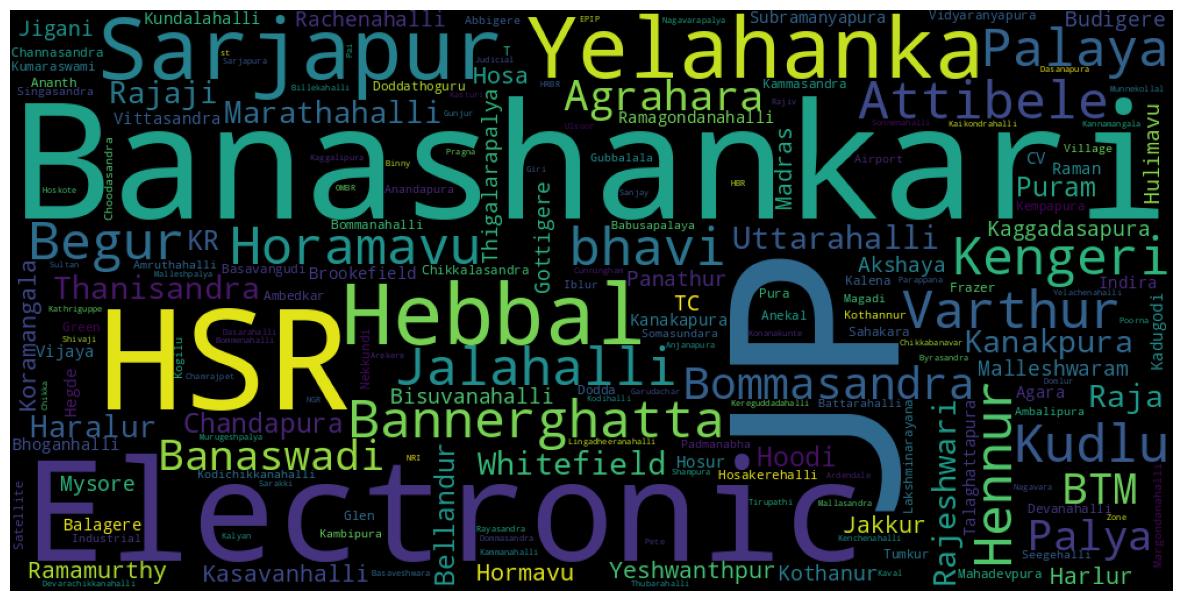

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
df.head()

,area_type,location,bath,balcony,price,waiting_days,area_sqft,bedrooms,loc_tag
0,Super built-up Area,Electronic City Phase II,2,1,39.07,352,1056.0,2,Electronic City Phase II
1,Plot Area,Chikka Tirupathi,5,3,120.00,0,2600.0,4,Chikka Tirupathi
2,Built-up Area,Uttarahalli,2,3,62.00,0,1440.0,3,Uttarahalli
3,Super built-up Area,Lingadheeranahalli,3,1,95.00,0,1521.0,3,Lingadheeranahalli
4,Super built-up Area,Kothanur,2,1,51.00,0,1200.0,2,Kothanur


In [ ]:
def loc_tag_refine(df):
    for i in range(0,len(L)):
        if L[i] in df['location']:
            return L[i]
            break
df['loc_tag_new']=df.apply(loc_tag_refine, axis=1)
df.head()

,area_type,location,bath,balcony,price,waiting_days,area_sqft,bedrooms,loc_tag,loc_tag_new
0,Super built-up Area,Electronic City Phase II,2,1,39.07,352,1056.0,2,Electronic City Phase II,Electronic
1,Plot Area,Chikka Tirupathi,5,3,120.00,0,2600.0,4,Chikka Tirupathi,Chikka
2,Built-up Area,Uttarahalli,2,3,62.00,0,1440.0,3,Uttarahalli,Uttarahalli
3,Super built-up Area,Lingadheeranahalli,3,1,95.00,0,1521.0,3,Lingadheeranahalli,Lingadheeranahalli
4,Super built-up Area,Kothanur,2,1,51.00,0,1200.0,2,Kothanur,Kothanur


In [ ]:
df.shape

(12697, 10)

In [ ]:
df['loc_tag'].value_counts()

others                 3173
Whitefield              514
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          261
                       ... 
Chikkabanavar            13
Sector 2 HSR Layout      13
Shivaji Nagar            13
Konanakunte              13
Murugeshpalya            13
Name: loc_tag, Length: 201, dtype: int64

In [ ]:
df['loc_tag_new'].value_counts()

Electronic    523
Whitefield    519
Sarjapur      483
JP            402
Raja          289
             ... 
TC              3
Agara           2
Kempapura       2
Industrial      1
Pura            1
Name: loc_tag_new, Length: 172, dtype: int64

In [ ]:
df.drop('loc_tag', axis=1, inplace=True)
df.rename(columns = {'loc_tag_new':'loc_tag'}, inplace = True)
df.head()

,area_type,location,bath,balcony,price,waiting_days,area_sqft,bedrooms,loc_tag
0,Super built-up Area,Electronic City Phase II,2,1,39.07,352,1056.0,2,Electronic
1,Plot Area,Chikka Tirupathi,5,3,120.00,0,2600.0,4,Chikka
2,Built-up Area,Uttarahalli,2,3,62.00,0,1440.0,3,Uttarahalli
3,Super built-up Area,Lingadheeranahalli,3,1,95.00,0,1521.0,3,Lingadheeranahalli
4,Super built-up Area,Kothanur,2,1,51.00,0,1200.0,2,Kothanur


In [ ]:
df['loc_tag'].isna().sum()

2333

In [ ]:
df['loc_tag'].fillna('other',inplace=True)

In [ ]:
df.head()

,area_type,location,bath,balcony,price,waiting_days,area_sqft,bedrooms,loc_tag
0,Super built-up Area,Electronic City Phase II,2,1,39.07,352,1056.0,2,Electronic
1,Plot Area,Chikka Tirupathi,5,3,120.00,0,2600.0,4,Chikka
2,Built-up Area,Uttarahalli,2,3,62.00,0,1440.0,3,Uttarahalli
3,Super built-up Area,Lingadheeranahalli,3,1,95.00,0,1521.0,3,Lingadheeranahalli
4,Super built-up Area,Kothanur,2,1,51.00,0,1200.0,2,Kothanur


In [ ]:
df['loc_tag'].value_counts().to_frame().to_csv('temp.csv')

In [ ]:
df['area_type'].replace(' ','_',regex=True,inplace=True)
df['area_type'].value_counts()

Super_built-up__Area    8472
Built-up__Area          2306
Plot__Area              1837
Carpet__Area              82
Name: area_type, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

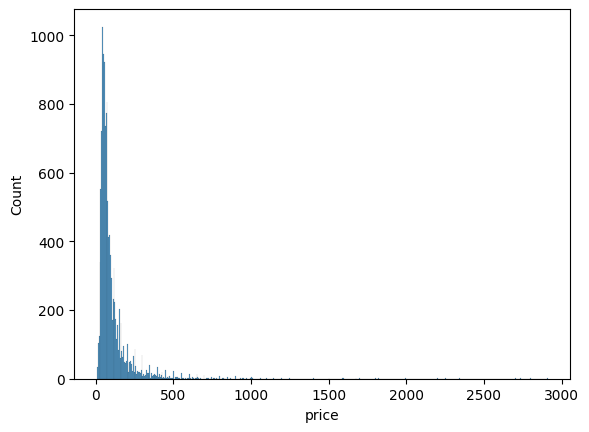

In [ ]:
sns.histplot(data=df['price'])

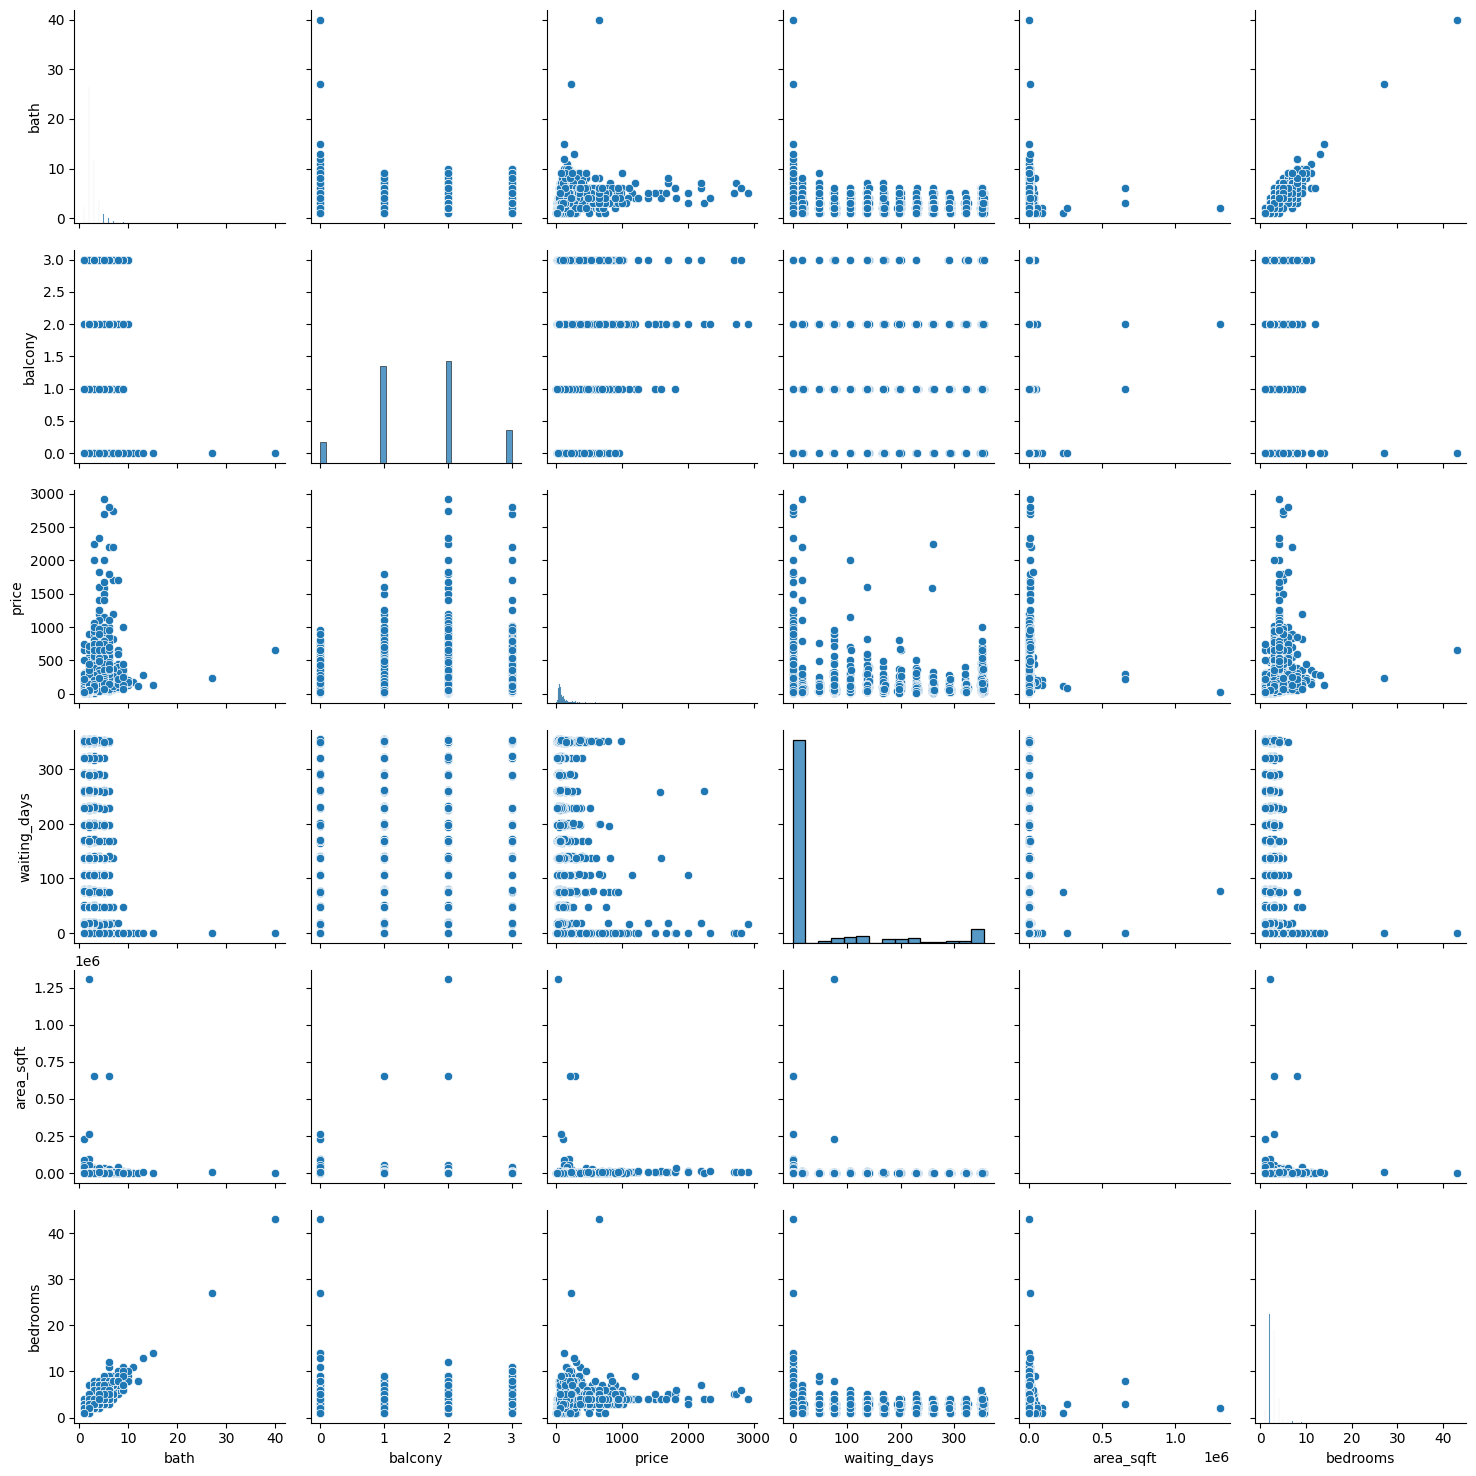

In [ ]:
sns.pairplot(df)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

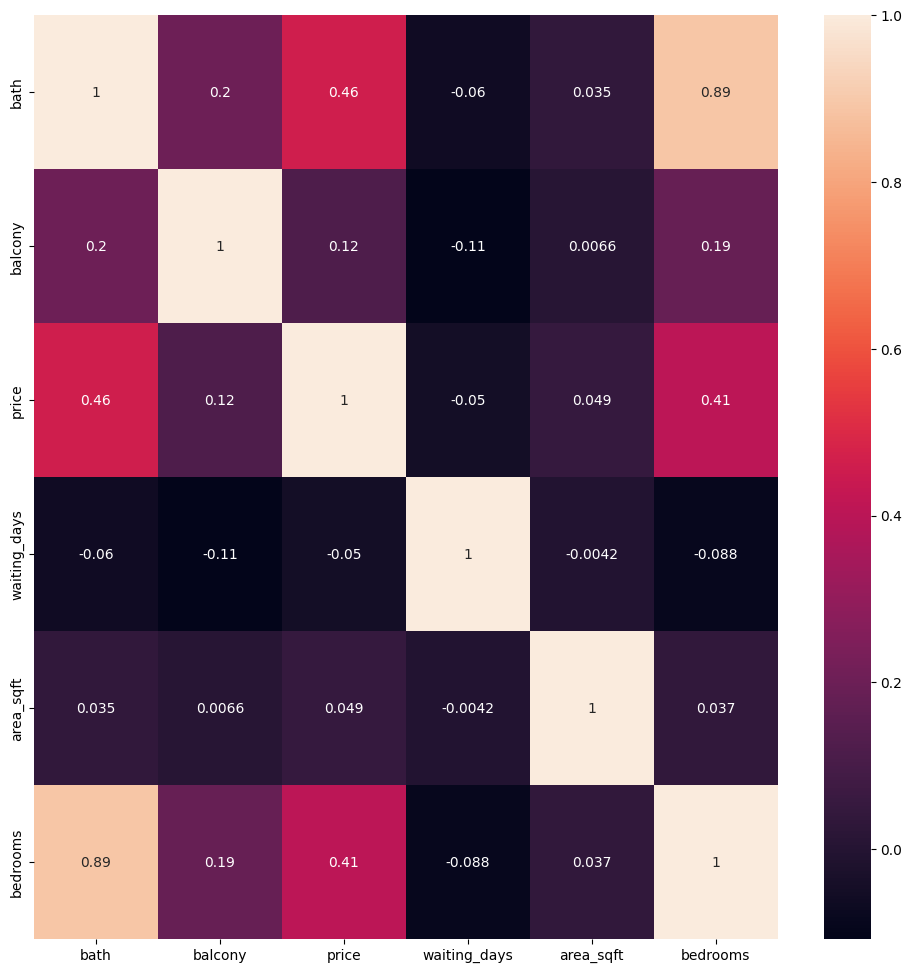

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

We have 9 columns, 6 of which are numerical.


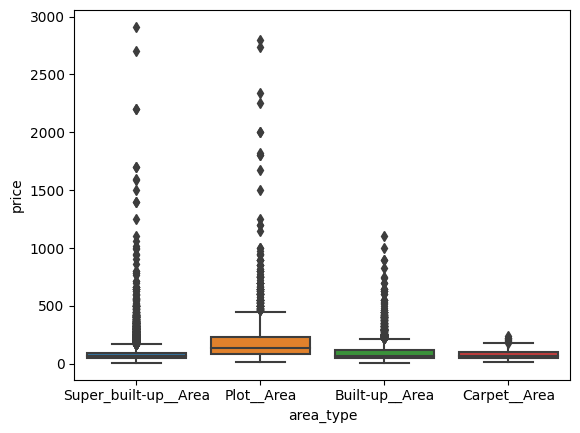

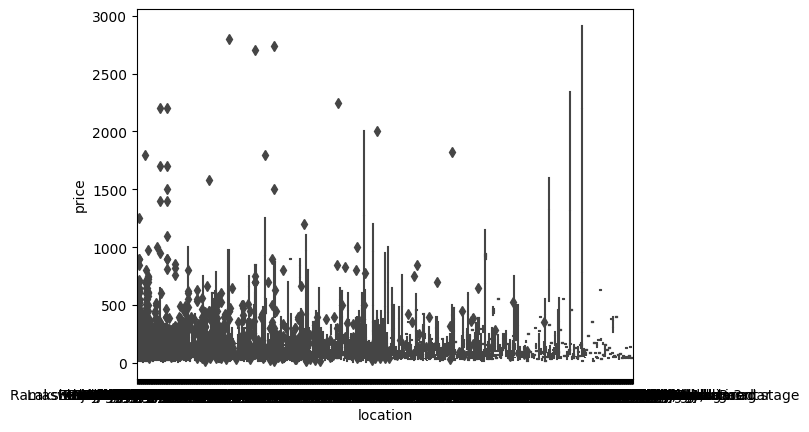

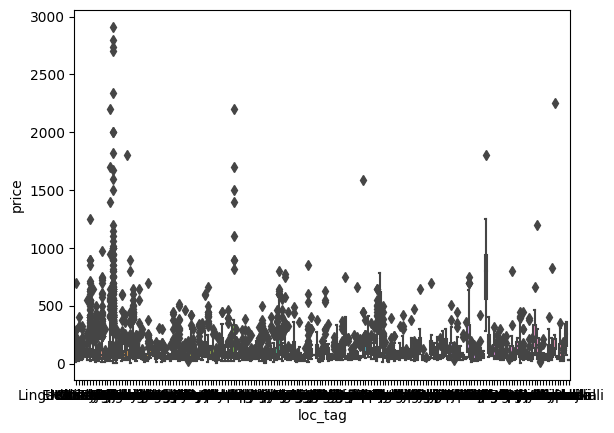

In [ ]:
num_columns = df.select_dtypes(include=np.number)
cat_columns = df.select_dtypes(exclude=np.number)


print(f'We have {len(df.columns)} columns, {len(num_columns.columns)} of which are numerical.')

features_to_analyse = cat_columns
for f in features_to_analyse:
    sns.boxplot(x=f, y='price', data=df)
    plt.show()

In [ ]:
df.head()

,area_type,location,bath,balcony,price,waiting_days,area_sqft,bedrooms,loc_tag
0,Super_built-up__Area,Electronic City Phase II,2,1,39.07,352,1056.0,2,Electronic
1,Plot__Area,Chikka Tirupathi,5,3,120.00,0,2600.0,4,Chikka
2,Built-up__Area,Uttarahalli,2,3,62.00,0,1440.0,3,Uttarahalli
3,Super_built-up__Area,Lingadheeranahalli,3,1,95.00,0,1521.0,3,Lingadheeranahalli
4,Super_built-up__Area,Kothanur,2,1,51.00,0,1200.0,2,Kothanur


In [ ]:
df1=df.drop('location',axis=1).copy()
df2=df.drop('loc_tag',axis=1).copy()

In [ ]:
df1.head()

,area_type,bath,balcony,price,waiting_days,area_sqft,bedrooms,loc_tag
0,Super_built-up__Area,2,1,39.07,352,1056.0,2,Electronic
1,Plot__Area,5,3,120.00,0,2600.0,4,Chikka
2,Built-up__Area,2,3,62.00,0,1440.0,3,Uttarahalli
3,Super_built-up__Area,3,1,95.00,0,1521.0,3,Lingadheeranahalli
4,Super_built-up__Area,2,1,51.00,0,1200.0,2,Kothanur


In [ ]:
df2.head()

,area_type,location,bath,balcony,price,waiting_days,area_sqft,bedrooms
0,Super_built-up__Area,Electronic City Phase II,2,1,39.07,352,1056.0,2
1,Plot__Area,Chikka Tirupathi,5,3,120.00,0,2600.0,4
2,Built-up__Area,Uttarahalli,2,3,62.00,0,1440.0,3
3,Super_built-up__Area,Lingadheeranahalli,3,1,95.00,0,1521.0,3
4,Super_built-up__Area,Kothanur,2,1,51.00,0,1200.0,2


In [ ]:
X = df2.drop(['price'],axis=1).copy()
y = df2['price'].copy()

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
OHE_X = pd.get_dummies(X, columns= X.columns[X.dtypes=='object'].to_list(),drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(OHE_X, y, test_size = 0.2, random_state = 4)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

In [ ]:
params = {
    'n_estimators':[500],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)]}

In [ ]:
reg = XGBRegressor(nthread=-1)

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      "parameter settings." %((time.time() - start), n_iter_search))

The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.


RandomizedSearchCV took 6045.56 seconds for 100 candidates parameter settings.


In [ ]:
best_regressor = random_search.best_estimator_
best_regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric='rmse',
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             nthread=-1, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Get predictions
y_pred = best_regressor.predict(X_test)

# Calculate MAE
rmse_pred = mean_absolute_error(y_test, y_pred)

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

Root Mean Absolute Error: 4.9075453802668285


In [ ]:
pd.DataFrame(random_search.cv_results_).to_csv('param.csv')

{'objective': 'reg:tweedie', 'n_estimators': 500, 'eval_metric': 'rmse', 'eta': 0.3, 'booster': 'gbtree'}

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rgr=XGBRegressor(objective= 'reg:tweedie',
                                 missing = np.nan,
                                 n_estimators=500,
                                 learning_rate= 0.3,
                                 eval_metric= 'rmse',
                                 booster='gbtree')

In [ ]:
scores= cross_val_score(rgr, OHE_X, y ,cv=5)
np.sqrt(scores).mean()*100, np.sqrt(scores).std()*100

(82.20803934527368, 5.177117013349132)

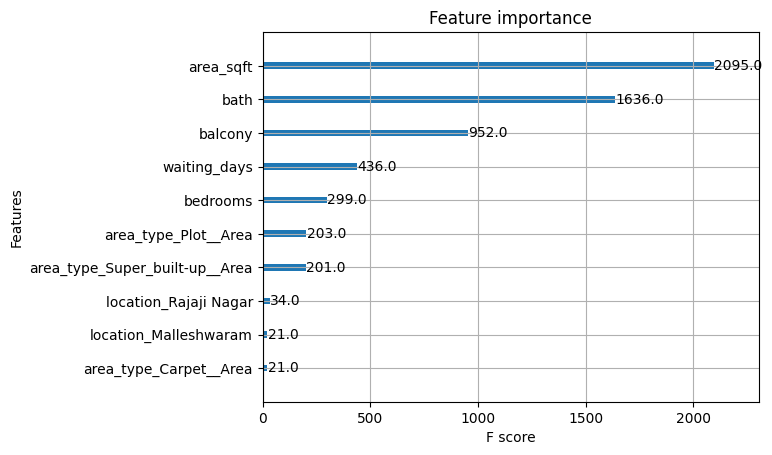

In [ ]:
%matplotlib inline
from xgboost import plot_importance
fit = XGBRegressor(objective= 'reg:tweedie',
                                 missing = np.nan,
                                 n_estimators=500,
                                 learning_rate= 0.3,
                                 eval_metric= 'rmse',
                                 booster='gbtree').fit(OHE_X, y)
plot_importance(fit, max_num_features=10)
plt.show()

In [ ]:
model=XGBRegressor(objective= 'reg:tweedie',
                                 missing = np.nan,
                                 n_estimators=500,
                                 learning_rate= 0.3,
                                 eval_metric= 'rmse',
                                 booster='gbtree')

model.fit(OHE_X, y)

# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 2541it [15:36,  2.68it/s]


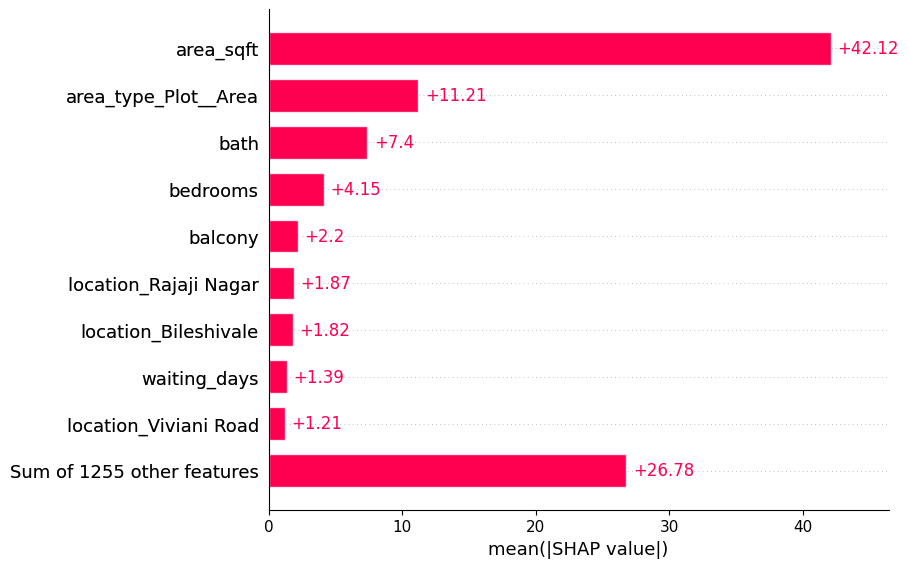

In [ ]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


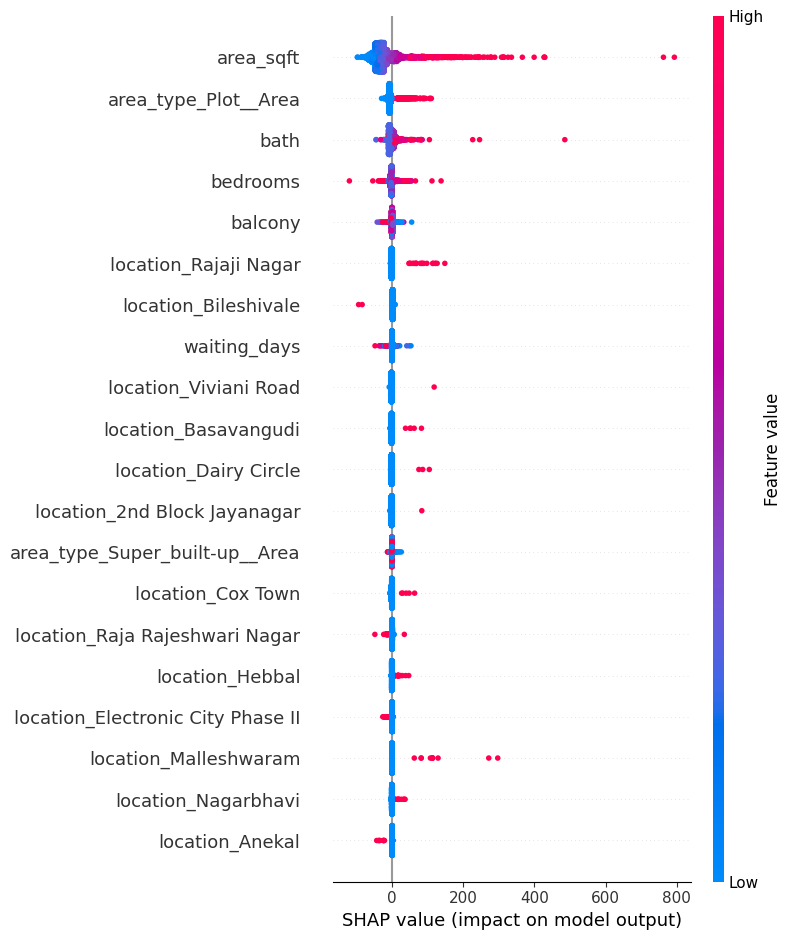

In [ ]:
shap.summary_plot(shap_values)

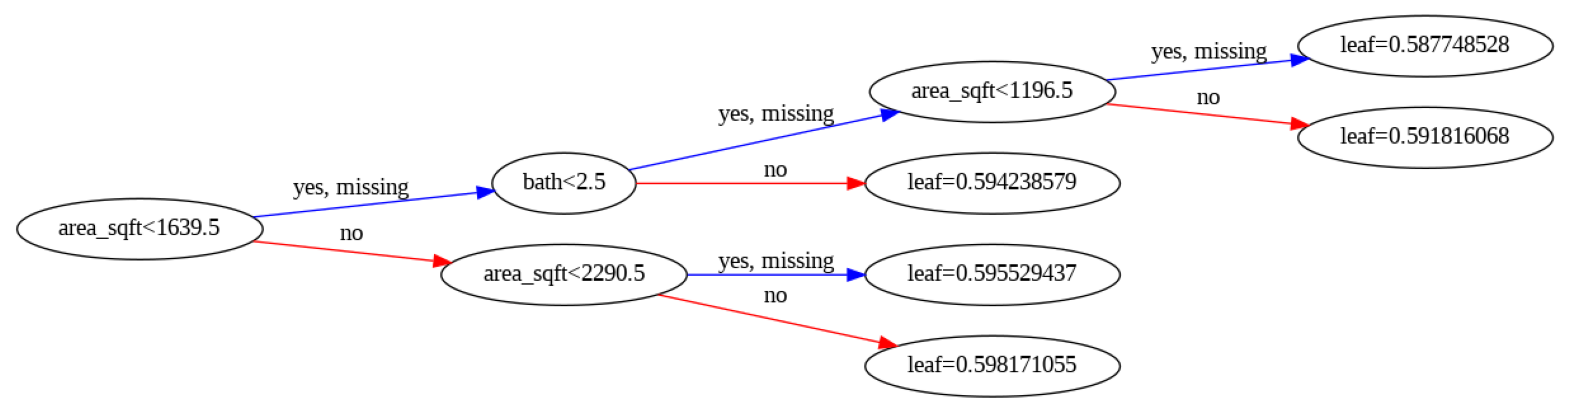

In [ ]:
from xgboost import plot_tree
plot_tree(model, rankdir='LR')
#plt.rcParams['figure.figsize']=[50, 30]
plt.gcf().set_size_inches(20, 10)
plt.savefig("BLR_RealEstate.png")